In [1]:
import subprocess
import sys

required_packages = [
    "numpy",
    "prettytable",
    "matplotlib"
]

def install_if_missing(package):
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is missing.")
        choice = input(f"Do you want to install '{package}'? (y/n): ").strip().lower()

        if choice == "y":
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        else:
            print(f"Skipped installing {package}.")

for pkg in required_packages:
    install_if_missing(pkg)

numpy is already installed.
prettytable is already installed.
matplotlib is already installed.


In [3]:
import math
import numpy as np

def f(s, m1=1, m2=2, k1=10, k2=5, c1=10, c2=1):
    coe1 = m1*m2
    coe2 = c2*(m1+m2*(c1+c2))
    coe3 = m1*k2+m2*(k1+k2)+c1*c2
    coe4 = c1*k2+c2*k1
    coe5 = k1*k2
    return coe1*(s**4) + coe2*(s**3) + coe3*(s**2) + coe4*(s) + coe5

def Df(s, m1=1, m2=2, k1=10, k2=5, c1=10, c2=1):
    f3 = 4*m1*m2*(s**3)
    f2 = 3*c2*(m1+m2*(c1+c2))*(s**2)
    f1 = 2*(m1*k2+m2*(k1+k2)+c1*c2)*(s**1)
    f0 = c1*k2+c2*k1
    return f3 + f2 + f1 + f0

def lambda_f(m1=1, m2=2, k1=10, k2=5, c1=10, c2=1):
    coe1 = m1*m2
    coe2 = c2*(m1+m2*(c1+c2))
    coe3 = m1*k2+m2*(k1+k2)+c1*c2
    coe4 = c1*k2+c2*k1
    coe5 = k1*k2
    return lambda s:coe1*(s**4) + coe2*(s**3) + coe3*(s**2) + coe4*(s) + coe5

def lambda_Df(m1=1, m2=2, k1=10, k2=5, c1=10, c2=1):
    coe1 = (m1*m2)*4
    coe2 = (c2*(m1+m2*(c1+c2)))*3
    coe3 = (m1*k2+m2*(k1+k2)+c1*c2)*2
    coe4 = (c1*k2+c2*k1)*1
    return lambda s:coe1*(s**3) + coe2*(s**2) + coe3*(s) + coe4

def newton(x0, tol, f, Df, errors = False):
    oldx=x0+2*tol
    x=x0
    if errors:
        errors = []
        while abs(oldx-x)>tol:
            oldx=x
            x=x-f(x)/Df(x)
            errors.append(abs(oldx-x))
        return x, errors
    else:
        while abs(oldx-x)>tol:
            oldx=x
            x=x-f(x)/Df(x)
        return x

def cfunc(c, tol):
    p = 1j
    v = newton(p, tol, lambda_f(c1=c), lambda_Df(c1=c))
    return np.real(v)

def goldensearch(a, b, tol, f):
    phi=(math.sqrt(5)-1)/2
    x1=a+(1-phi)*(b-a)
    x2=a+phi*(b-a)
    f1=f(x1, tol)
    f2=f(x2, tol)
    while (b-a)/2>tol:
        if f1<f2:
            b=x2
            x2=x1
            x1=a+(1-phi)*(b-a)
            f2=f1
            f1=f(x1, tol)
        else:
            a=x1
            x1=x2
            x2=a+phi*(b-a)
            f1=f2
            f2=f(x2, tol)
    return((a+b)/2)

In [4]:
from prettytable import PrettyTable

def make_row(i, j, shit):
    row = [i]
    for k in range(j):
        try:
            row.append(shit[k][i])
        except:
            row.append("")
    return row

punktar = [[-9.45, -9.4], [-1.4, -1.3]]

f = lambda s: 2*s**4 + 23*s**3 + 45*s**2 + 60*s + 50
f_ = lambda s: 8*s**3 + 69*s**2 + 90*s + 60

target_E = (1*10**(-3))        # target_E er markmiðsskekkjan

niðurst = []
villur = []

#====================
# Helmingunaraðferð!
#====================
for i in punktar:

    a = i[0]
    b = i[1]
    
    # Því næst þurfum við að skilgreina breyturnar fyrir helmingunaraðferðina

    n = 0                           # n er fjöldi ítrekana
    E = (b-a)/(2**n)                # E er skekkjan

    # Þá þurfum við að skilgreina while lykkjuna.
    # While lykkjan heldur áfram þar til skekkjan er minni en eða jafnt og markmiðsskekkjan.

    v = [E]

    while E > target_E:

        c = (a+b)/2                 # c er miðpunktur a og b
    
        if f(c) == 0:               # Ef fallgildið í c er 0, þá er c rótin
            break   
    
        if f(a)*f(c) < 0:           # Ef fallgildin í a og c hafa mismunandi formerki, þá er rótin á milli a og c
            b = c
        else:                       # Annars er rótin á milli c og b
            a = c
    
        n = n+1                     # Hækka fjölda ítrekana
        E = (b-a)/(2**n)            # Uppfæra skekkjuna
        
        v.append(E)

    niðurst.append(c)
    villur.append(v)

#================
# Newton-Raphson
#================
for i in punktar:
    a = i[0]
    b = a - f(a)/f_(a)
    E = abs(b-a)
    
    v = [E]
    j = 0
    while E > target_E:
        b = a - f(a)/f_(a)
        E = abs(b-a)
        v.append(E)
        a = b

        j = j+1
        if j == 20:
            break

    niðurst.append(b)
    villur.append(v)

#================
# Villur í töflu
#================

t = PrettyTable()
t.field_names = ["Ítrekun", "Helmingunar, rót 1", "Helmingunar, rót 2", "Newton-Raphson, rót 1", "Newton-Raphson, rót 2"]

print("Niðurstöður:")
print(niðurst)

print("Villur:")
for i in range(len(villur[0])):
    t.add_row(make_row(i, len(villur), villur))
print(t)


Niðurstöður:
[-9.418750000000001, -1.36875, -9.419551094156146, -1.373605568198262]
Villur:
+---------+-----------------------+-----------------------+------------------------+------------------------+
| Ítrekun |   Helmingunar, rót 1  |   Helmingunar, rót 2  | Newton-Raphson, rót 1  | Newton-Raphson, rót 2  |
+---------+-----------------------+-----------------------+------------------------+------------------------+
|    0    |  0.049999999999998934 |  0.09999999999999987  |  0.030137867224096837  |  0.025985450854339343  |
|    1    |  0.012500000000000178 |  0.02499999999999991  |  0.030137867224096837  |  0.025985450854339343  |
|    2    | 0.0031249999999998224 |  0.006249999999999978 | 0.00031103861975623204 | 0.00040898094739860724 |
|    3    | 0.0007812499999999556 | 0.0015624999999999944 |                        |                        |
+---------+-----------------------+-----------------------+------------------------+------------------------+


In [3]:
import numpy as np
from functions import newton

f = lambda s: 2*s**4 + 23*s**3 + 45*s**2 + 60*s + 50
Df = lambda s: 8*s**3 + 69*s**2 + 90*s + 60

p = -5j
tol = 10**(-10)

x1 = newton(p, tol, f, Df, errors=True)
print(x1[0])

x2 = np.conj(x1[0])
print(x2)

samleitni = []
for i in range(len(x1[1])-1):
    samleitni.append(x1[1][i+1]/(x1[1][i]**2))

print("|         Villur         |         Samleitni         |")
for i in range(len(x1[1])):
    try:
        print("|  ", x1[1][i], "  |  ", samleitni[i], "  |")
    except:
        print("|  ", x1[1][i], "  |  ", "  |")



(-0.35342173481620437-1.3443489177880485j)
(-0.35342173481620437+1.3443489177880485j)
|         Villur         |         Samleitni         |
|   1.4718878729415232   |   0.4793290870955758   |
|   1.0384443751605115   |   0.6391336319633897   |
|   0.689220438535389   |   0.8625474712142277   |
|   0.4097314511265196   |   1.0941561137765663   |
|   0.18368677743348724   |   1.048120350160558   |
|   0.03536445286425975   |   0.9611697992337029   |
|   0.0012020817483415157   |   0.9784663478876786   |
|   1.413884390987206e-06   |   0.978194869290908   |
|   1.9554791086859194e-12   |     |


12.548398124658576


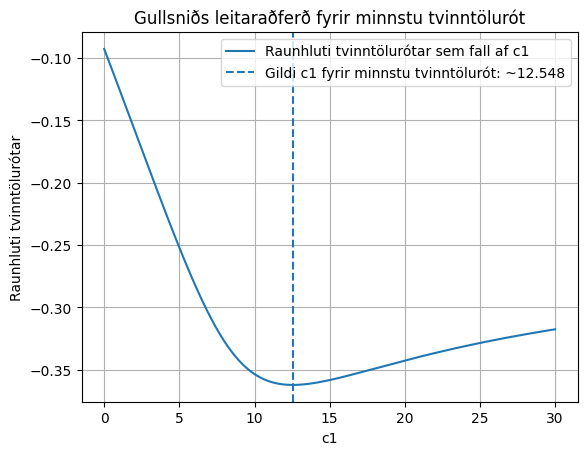

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from functions import goldensearch, cfunc

a = 0
b = 30

tol = 10**(-10)

c_vals = np.linspace(a, b, 1000)
c = []
for i in c_vals:
    c.append(cfunc(i, tol))

c0 = goldensearch(a, b, tol, cfunc)

print(c0)

plt.plot(c_vals, c)
plt.axvline(c0, linestyle = "--")
plt.xlabel("c1")
plt.ylabel("Raunhluti tvinntölurótar")
plt.title("Gullsniðs leitaraðferð fyrir minnstu tvinntölurót")
plt.legend(["Raunhluti tvinntölurótar sem fall af c1", f"Gildi c1 fyrir minnstu tvinntölurót: ~{round(c0, 3)}"])
plt.grid()
plt.show()


Lausn 1: (-0.35+1.34j)
Lausn 2: (-1.37-0j)
Lausn 3: (-0.35-1.34j)
Lausn 4: (-9.42-0j)


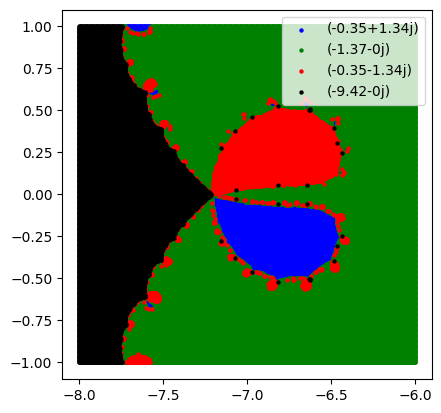

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import functions as f


ACCURACY = 2 # fjöldi aukastafna
GRID_SIZE = 400 # fjöldi punkta í grid
                #Hærri tala = hærri upplausn og lengri tími

ROUND = ACCURACY
TOL = 10**(-ACCURACY-1)

X_RANGE = [-8, -6]
Y_RANGE = [-1, 1]



def make_grid(R_low, R_high, I_low, I_high, N):
    R = np.linspace(R_low, R_high, N)
    I = np.linspace(I_low, I_high, N)
    grid = []
    for i in R:
        grid.append([])
        for j in I:
            grid[-1].append(i+j*1j)
    return grid
#Býr til 400x400 grid af punktum


grid = make_grid(X_RANGE[0], X_RANGE[1], Y_RANGE[0], Y_RANGE[1], GRID_SIZE)

results = []
for x in grid:
    results.append([])
    for y in x:
        results[-1].append(f.newton(y, TOL, f.f, f.Df))
#Notar newton aðferðina

four_solutions = []

for x in results:
    for y in x:
        four_solutions.append(np.round(y, ROUND))
#Setur allar lausnir í einn lista

four_solutions = list(set(four_solutions))
four_solutions.sort()
#Tekur út endurtektir af lausnum og endar í fjórum



for i, x in enumerate(four_solutions):
    print("Lausn", (str(i+1) + ":"), x)
#Sýnir lausnir


result_colors = []

for x in results:
    result_colors.append([])
    for y in x:
        y=np.round(y, ROUND)
        if y in four_solutions:
            result_colors[-1].append(four_solutions.index(y))
        else:
            print("Got", y, "which is not in four_solutions")
            exit("Error: Result not one of four")
#Gefur hverri staðsetningu í gridinu tölu á bilinu 0-3 eftir hvaða lausn upphafspunktur gefur
            
groups = []
for i,x in enumerate(result_colors):
    for j,y in enumerate(x):
        while len(groups) < y+1:
            groups.append([])
        groups[y].append((grid[i][j].real, grid[i][j].imag))
colors = ["blue", "green", "red", "black"]
#Skiptir upphafspunktum niður í hópa eftir hvaða lausn þeir gefa


plt.figure()
for i,x in enumerate(groups):
    real = [j[0] for j in x]
    imag = [j[1] for j in x]
    plt.scatter(real, imag, s=10, marker='.', linewidths=0, color=colors[i], label=four_solutions[i])
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('on')
plt.grid(False)
plt.legend()
plt.show()
#Plottar lausnir